In [16]:
#Partie 1
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

L = 5
K = len(np.unique(train_labels))
lr = 0.001
nb_epochs = 20
node_per_hidden_layer = 300
nb_batches = 1000
W = []
best_w = []
losses = []
best_accuracy = 0
accuracies = []

X_train = np.reshape(train_images, (train_images.shape[0], train_images.shape[1]*train_images.shape[2]))
X_test = np.reshape(test_images, (test_images.shape[0], test_images.shape[1]*test_images.shape[2]))

Y_train = np.zeros((train_labels.shape[0], K))
Y_train[np.arange(Y_train.shape[0]), train_labels] = 1

Y_test = np.zeros((test_labels.shape[0], K))
Y_test[np.arange(Y_test.shape[0]), test_labels] = 1


# X_test, X_validation, Y_test, Y_validation = train_test_split(X_test, Y_test, test_size=0.5, random_state=42)


In [17]:
def set_w():
    W.clear()
    W.append(np.random.normal(0, 0.01, (X_train.shape[1]+1, node_per_hidden_layer)))
    for i in range(L-1):
        W.append(np.random.normal(0, 0.01, (node_per_hidden_layer+1, node_per_hidden_layer)))
    W.append(np.random.normal(0, 0.01, (node_per_hidden_layer+1, K)))


def softmax(z):
    exp = np.exp(z - z.max(1)[:,np.newaxis])
    return np.array(exp / exp.sum(1)[:,np.newaxis])


def softmax_derivative(z):
    sm = softmax(z)
    return sm * (1-sm)


def softmax_derivativeA(a):
    return a * (1-a)


def ReLU(z):
    return np.maximum(z, 0)


def ReLU_derivative(z):
    return (z >= 0).astype(int)


def ReLU_derivativeA(a):
    return (a >= 0).astype(int)


def get_loss(y, y_pred):
    return -np.sum(y * np.log(y_pred))


def get_accuracy(y, y_pred):
    correct = 0
    for i in range(len(y_pred)):
        if np.argmax(y_pred[i]) == np.argmax(y[i]):
            correct += 1
    return correct / len(y)

In [18]:
def fit():
    minibatch_size = len(X_train) // nb_batches
    for epoch in range(nb_epochs):
        permutaion = list(np.random.permutation(X_train.shape[0]))
        X_shuffle = X_train[permutaion]
        Y_shuffle = Y_train[permutaion]
        print("Epoch----------------", epoch)
        for batche in range(0, X_shuffle.shape[0], minibatch_size):
            Z = [None] * (L + 2)
            a = [None] * (L + 2)
            delta = [None] * (L + 2)
            X = X_shuffle[batche:batche+minibatch_size]
            Y = Y_shuffle[batche:batche+minibatch_size]

            #forward propagation
            a[0] = np.append(X, np.ones((len(X), 1)), axis=1)
            for i in range(L):
                Z[i + 1] = a[i] @ W[i]
                a[i + 1] = np.append(ReLU(Z[i+1]), np.ones((len(Z[i+1]), 1), dtype=int), axis=1)

            Z[-1] = a[L] @ W[L]
            a[-1] = softmax(Z[-1])

            #back propagation
            delta[-1] = (Y - a[-1]) * softmax_derivativeA(a[-1])
            for i in range(L, 0, -1):
                delta[i] = (delta[i+1] @ W[i].T)[:,:-1] * ReLU_derivative(Z[i])

            for i in range(len(W)):
                g = a[i].T @ delta[i+1] / len(delta[i+1])
                W[i] = W[i] + lr * g

        get_loss_and_accuracy(True)   

In [19]:

def get_loss_and_accuracy(validation):
    global best_accuracy, best_w
    X = X_test
    Y = Y_test
    if validation:
        X = X_test
        Y = Y_test
               
    Z = [None] * (L + 2)
    a = [None] * (L + 2)

    a[0] = np.append(X, np.ones((len(X), 1)), axis=1)
    for i in range(L):
        Z[i + 1] = a[i] @ W[i]
        a[i + 1] = np.append(ReLU(Z[i+1]), np.ones((len(X), 1)), axis=1)

    Z[-1] = a[L] @ W[L]
    a[-1] = softmax(Z[-1])
    loss = get_loss(Y, a[-1])
    accuracy = get_accuracy(Y, a[-1])
    # if validation:
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_w = W.copy()
    accuracies.append(accuracy)
    losses.append(loss)

In [20]:
set_w()
losses.clear()
accuracies.clear()
fit()


Epoch---------------- 0
Epoch---------------- 1
Epoch---------------- 2
Epoch---------------- 3
Epoch---------------- 4
Epoch---------------- 5
Epoch---------------- 6
Epoch---------------- 7
Epoch---------------- 8
Epoch---------------- 9
Epoch---------------- 10
Epoch---------------- 11
Epoch---------------- 12
Epoch---------------- 13
Epoch---------------- 14
Epoch---------------- 15
Epoch---------------- 16
Epoch---------------- 17
Epoch---------------- 18
Epoch---------------- 19


In [21]:
# get_loss_and_accuracy(False)


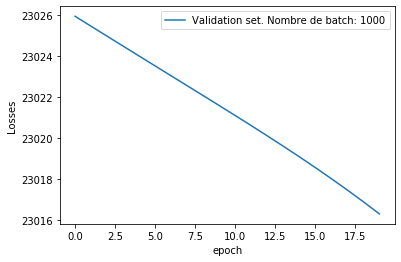

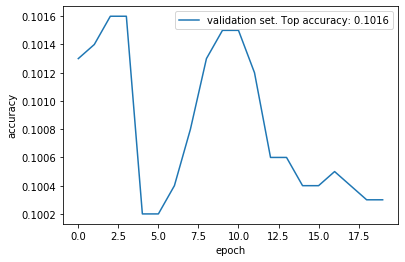

In [22]:

plt.plot(losses, label= "Validation set. Nombre de batch: " + str(nb_batches))
plt.ylabel("Losses")
plt.xlabel("epoch")
plt.legend()
plt.show()
plt.plot(accuracies, label="validation set. Top accuracy: " + str(best_accuracy))
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend()
plt.show()